# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

### Preperations:

In [ ]:
! pip install turicreate
! wget --directory-prefix ./datasets/AgameofthronesLCG http://dynamics.cs.washington.edu/nobackup/reddit/AgameofthronesLCG.tar.gz
! tar -xvf ./datasets/AgameofthronesLCG/AgameofthronesLCG.tar.gz
! ls -l ./datasets/AgameofthronesLCG

In [ ]:
# IMPORTS
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import turicreate as turi
import networkx as ntkx
%matplotlib inline

### Q&A:

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

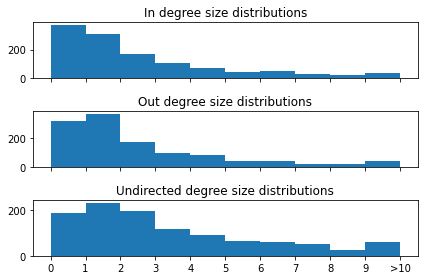

In [ ]:
episode_graph = turi.load_sgraph('/content/AgameofthronesLCG.2012-06-17.2016-10-31.sgraph')
graph_degrees = turi.degree_counting.create(episode_graph)
deg_graph = graph_degrees['graph'] # a new SGraph with degree data attached to each vertex
in_degree = deg_graph.vertices[['__id', 'in_degree']]
out_degree = deg_graph.vertices[['__id', 'out_degree']]
total_degree = deg_graph.vertices[['__id', 'total_degree']]

fig, axis = plt.subplots(3, 1, sharex=True)

x_ticks = np.arange(0, 11, 1)
x_tick_labels = [f'{x}' for x in x_ticks]
x_tick_labels[-1] = f'>{x_tick_labels[-1]}'

axis[0].set_title('In degree size distributions')
axis[0].hist(in_degree['in_degree'], bins=x_ticks,)
axis[0].set_xticks(x_ticks)
axis[0].set_xticklabels(x_tick_labels)

axis[1].set_title('Out degree size distributions')
axis[1].hist(out_degree['out_degree'], bins=x_ticks,)

axis[2].set_title('Undirected degree size distributions')
axis[2].hist(total_degree['total_degree'], bins=x_ticks,)

plt.tight_layout()
plt.show()

**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

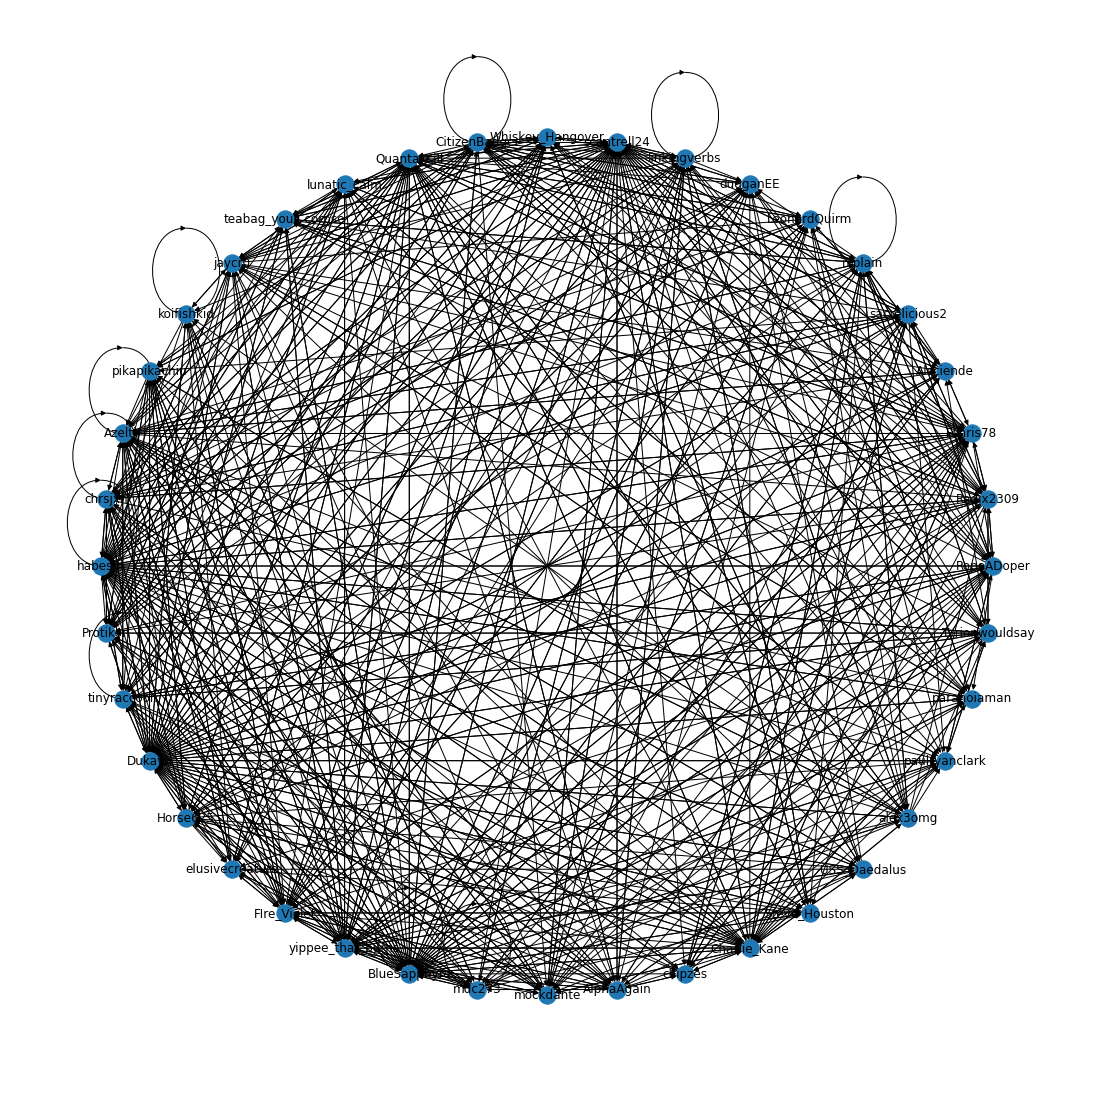

In [ ]:
# use networkx graphs for easier algorithms implementation:
got_episode_graph_ntx = ntkx.DiGraph()
vertices_ids = episode_graph.get_vertices()['__id'].to_numpy()
edges_src = episode_graph.edges['__src_id'].to_numpy()
edges_dst = episode_graph.edges['__dst_id'].to_numpy()
edges = zip(edges_src, edges_dst)
got_episode_graph_ntx.add_nodes_from(vertices_ids)
got_episode_graph_ntx.add_edges_from(edges)

closness_cntr_got_episode_graph = ntkx.closeness_centrality(got_episode_graph_ntx) 

top40_characters_srt_by_cntr = sorted(dict(closness_cntr_got_episode_graph).items(), key=lambda x: x[1], reverse=True)[:40]
top40_characters_ids = np.array(list(map(lambda x: x[0], top40_characters_srt_by_cntr)))
top40_characters_graph = got_episode_graph_ntx.subgraph(top40_characters_ids)

plt.figure(figsize=(15,15))
ntkx.draw_circular(top40_characters_graph, with_labels=True)

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [ ]:
# from SGraph to networkx graph for ease of implementation
got_episode_graph_ntx = ntkx.DiGraph()
vertices_ids = episode_graph.get_vertices()['__id'].to_numpy()
edges_src = episode_graph.edges['__src_id'].to_numpy()
edges_dst = episode_graph.edges['__dst_id'].to_numpy()
edges = zip(edges_src, edges_dst)
got_episode_graph_ntx.add_nodes_from(vertices_ids)
got_episode_graph_ntx.add_edges_from(edges)

# Page rank:
nodes_pr_values_dict = ntkx.algorithms.link_analysis.pagerank_alg.pagerank(got_episode_graph_ntx)
# triangles - NOTE that triangles algorithm is not suitable for directed graphs, so we use a non-directed version of our graph:
nodes_traingles_values_dict = ntkx.algorithms.cluster.triangles(got_episode_graph_ntx.to_undirected())
# average shortest path from each vertext - I ASSUME the requirement is for each vertex to all other vertices.
shortest_paths_for_node = {}
for node1 in got_episode_graph_ntx.nodes:
  for node2 in got_episode_graph_ntx.nodes:
    if node1==node2:
      continue
    try:
      shortest_paths_for_node[(node1, node2)] = shortest_paths_for_node.get((node1, node2), []) + [ntkx.algorithms.shortest_paths.generic.shortest_path(got_episode_graph_ntx, source=node1, target=node2)]
    except Exception as e:
      # no path was found, so continue to next iterations:
      continue

avg_shortest_paths_for_node = {}

for nodes, paths in shortest_paths_for_node.items():
  avg_shortest_paths_for_node[nodes] = sum(list(map(lambda x: len(x), paths)))/len(paths)

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [ ]:
# ASSUMING DEGREE MEANS IN+OUT EDGES (undirected graph)

OutEdgeView([('Dovian', 'IndigoSpartan'), ('Dovian', 'mplain'), ('Dovian', 'Denadamedacro'), ('Shunt19', 'Sleepa'), ('Shunt19', 'cubemstr'), ('MaesterBelza', 'yippee_that_burns'), ('samlsso', '4rth4gon'), ('Haiguy91', 'PantyGusher'), ('rsixidor', 'mdc273'), ('Meromer0', 'Azeltir'), ('TheOxytocin', 'mattgrosso'), ('TheOxytocin', 'Grimple409'), ('TheOxytocin', 'monkeysandpirates'), ('TheOxytocin', 'Jball32'), ('MrBond90', 'Blaze_King'), ('MrBond90', 'Crashpoint'), ('MrBond90', 'Dukayn'), ('MrBond90', 'Radix2309'), ('Robo_173', 'CBHero'), ('Robo_173', 'Ruluzz'), ('wickershamb', 'CitizenBadger'), ('wickershamb', 'guaranteedolphins'), ('wickershamb', 'chipzes'), ('solprose315', 'buicks'), ('teageltron', 'Whiskeyjackza'), ('myveryownredditaccou', 'Chumbert1834'), ('myveryownredditaccou', 'SevenCs'), ('myveryownredditaccou', 'scantrell24'), ('myveryownredditaccou', 'andrewaa'), ('myveryownredditaccou', 'chipzes'), ('myveryownredditaccou', 'OpT1mUs'), ('misomiso82', 'scantrell24'), ('Alberaan'

In [ ]:
# saving in the correct format for cytoscape and gephi
# Gephi format
ntkx.write_gexf(got_episode_graph_ntx, "./datasets/GOT-networks/GOT_network_full.gexf")
# Cytoscape format
ntkx.write_gml(got_episode_graph_ntx, "./datasets/GOT-networks/GOT_network_full.gml")

/bin/bash: -c: line 0: syntax error near unexpected token `https://drive.google.com/file/d/1yppbIe5HnKFpUeyJM2uDyw6-cHVjVAme/view?usp=sharing'
/bin/bash: -c: line 0: ` [picture](https://drive.google.com/file/d/1yppbIe5HnKFpUeyJM2uDyw6-cHVjVAme/view?usp=sharing)'


#### Cytoscape:
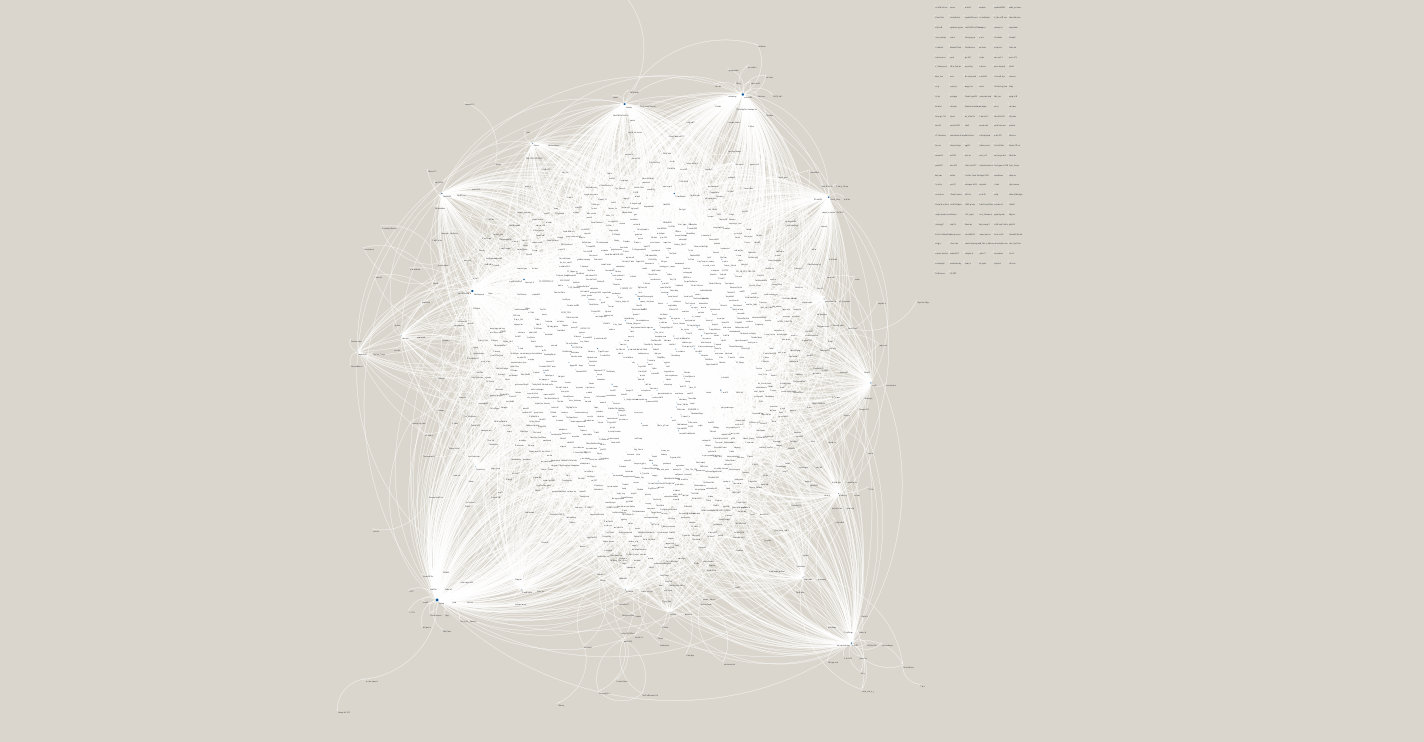

#### Gephi:
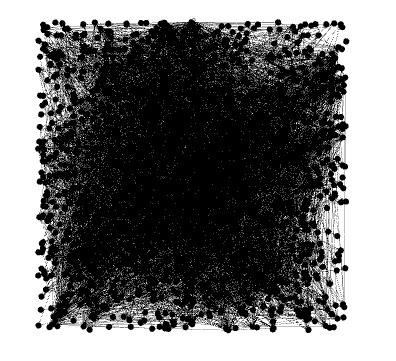

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

#Verticies: 59|#Edges: 484


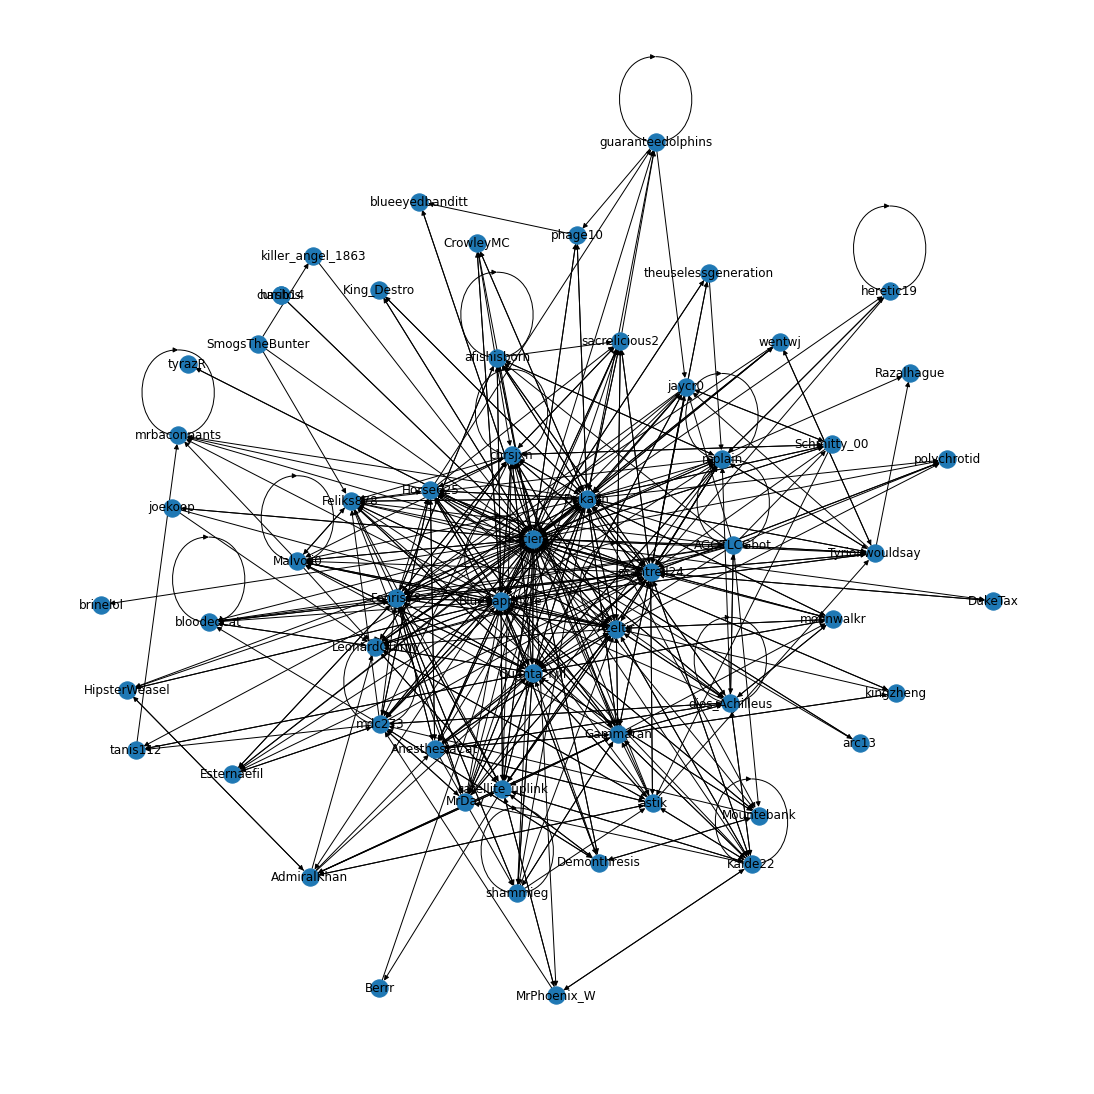

In [ ]:
def draw_subgraph_by_vertex_id(graph_ntkx: ntkx.DiGraph, vertex_id: str):
  # to get both in and out, we use the undirected version of the given graph.
  vertex_neighbors = list(dict(graph_ntkx.to_undirected().adj['Alsciende']).keys())
  subgraph = graph_ntkx.subgraph([vertex_id]+vertex_neighbors)

  # drawing the subgraph
  plt.figure(figsize=(15, 15))
  ntkx.draw_kamada_kawai(subgraph, with_labels=True)
  
  # calculate and return+print the number of vertices and edges in subgraph 
  num_vertices = len(subgraph.nodes)
  num_edges = len(subgraph.edges)
  print(f'#Verticies: {num_vertices}|#Edges: {num_edges}')

got_episode_graph_ntx = ntkx.DiGraph()
vertices_ids = episode_graph.get_vertices()['__id'].to_numpy()
edges_src = episode_graph.edges['__src_id'].to_numpy()
edges_dst = episode_graph.edges['__dst_id'].to_numpy()
edges = zip(edges_src, edges_dst)
got_episode_graph_ntx.add_nodes_from(vertices_ids)
got_episode_graph_ntx.add_edges_from(edges)
draw_subgraph_by_vertex_id(got_episode_graph_ntx, 'Alsciende')

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

In [ ]:
#  downloading the dataset
! wget --directory-prefix ./datasets/FreeInternetChess http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
! tar -xvf ./datasets/FreeInternetChess/fcis.tar.gz

In [ ]:
import turicreate as turi
import networkx as ntkx

# limiting the size which we read to avoid out of memory exceptions: 
vertices_sframe = turi.SFrame.read_csv('/content/FCIS/fcis_chess.vertices.csv', nrows=100000)
edges_sframe = turi.SFrame.read_csv('/content/FCIS/fcis_chess.interactions.csv', nrows=100000)

Finished parsing file /content/FCIS/fcis_chess.vertices.csv

Parsing completed. Parsed 100 lines in 1.25331 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/FCIS/fcis_chess.vertices.csv

Parsing completed. Parsed 100000 lines in 0.606324 secs.

Finished parsing file /content/FCIS/fcis_chess.interactions.csv

Parsing completed. Parsed 100 lines in 3.57776 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/FCIS/fcis_chess.interactions.csv

Parsing completed. Parsed 100000 lines in 1.38793 secs.

In [ ]:
chess_sgraph = turi.SGraph(vertices=vertices_sframe, edges=edges_sframe, vid_field='v_id', src_field='src_id', dst_field='dst_id')
# get top-10 most centeral players using pagerank algorithm
top10_most_centeral_players_ids = turi.pagerank.create(chess_sgraph)['pagerank'].sort('pagerank', ascending=False)[:10]
print(f'Top 10 most center players using pagerank algorithm:\n{top10_most_centeral_players_ids["__id"]}')

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 84414.3               |

| 2         | 1561.51               |

| 3         | 749.449               |

| 4         | 452.64                |

| 5         | 292.673               |

| 6         | 196.886               |

| 7         | 137.959               |

| 8         | 98.4282               |

| 9         | 71.7632               |

| 10        | 53.1776               |

| 11        | 39.8097               |

| 12        | 30.2114               |

| 13        | 23.0625               |

| 14        | 17.777                |

| 15        | 13.751                |

| 16        | 10.7258               |

| 17        | 8.3756                |

| 18        | 6.5928                |

| 19        | 5.18796               |

| 20        | 4.11237               |

+-----------+-----------------------+

Top 10 most center players using pagerank algorithm:
['FriarTuck', 'Wronskian', 'mscp', 'secone', 'stupido', 'pkch', 'JagorCrafty', 'MATTtheRATT', 'RegisAlum', 'hdyl']


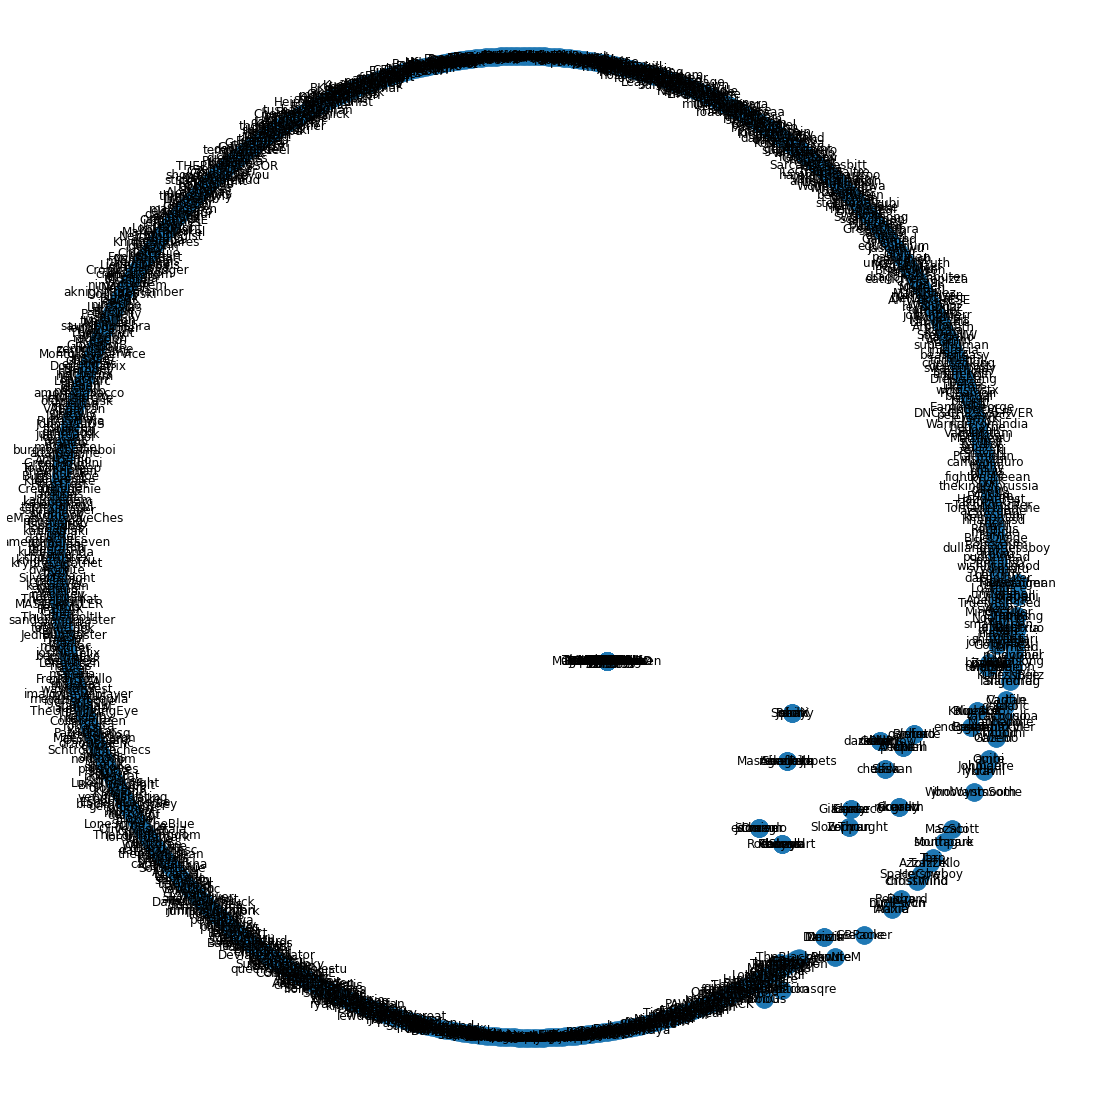

In [ ]:
# visualizing only 1k vertices and edges of the network using networkx
# converting the sgraph to networkx directional graph

chess_ntx_graph = ntkx.DiGraph()
vertices_ids = chess_sgraph.get_vertices()['__id'].to_numpy()[:1000]
edges_src = chess_sgraph.edges['__src_id'].to_numpy()[:1000]
edges_dst = chess_sgraph.edges['__dst_id'].to_numpy()[:1000]
edges = zip(edges_src, edges_dst)
chess_ntx_graph.add_nodes_from(vertices_ids)
chess_ntx_graph.add_edges_from(edges)

# drawing the subgraph
plt.figure(figsize=(15, 15))
ntkx.draw_kamada_kawai(chess_ntx_graph, with_labels=True)

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

In [ ]:
!mkdir -r /content/datasets/ltor

# download the dataset from Kaggle and unzip it
! pip install kaggle 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 

!kaggle datasets download paultimothymooney/lord-of-the-rings-data  -p ./datasets/ltor
!unzip ./datasets/ltor/*.zip  -d ./datasets/ltor

mkdir: invalid option -- 'r'
Try 'mkdir --help' for more information.
  0% 0.00/88.0k [00:00<?, ?B/s]
100% 88.0k/88.0k [00:00<00:00, 5.80MB/s]
Archive:  ./datasets/ltor/lord-of-the-rings-data.zip
  inflating: ./datasets/ltor/lotr_characters.csv  
  inflating: ./datasets/ltor/lotr_scripts.csv  


In [ ]:
import pandas as pd


lotr_df = pd.read_csv('/content/datasets/ltor/lotr_characters.csv')
# filtering only the attributes we need and droping all rows with missing values
lotr_df = lotr_df[['name','spouse','gender', 'race']].dropna()

# fixing some values:
lotr_df['gender'] = lotr_df['gender'].apply(lambda x: 'Male' if x.lower()=='male' else x) 
# removing rows where spouse is None (the string) or 'unnamed wife'
lotr_df = lotr_df[lotr_df.spouse != 'None']
lotr_df = lotr_df[lotr_df.spouse != 'Unnamed wife']

# using an undirected graph as relationships are mutual
lotr_graph = ntkx.Graph()
nodes_and_attributes_dicts = [(row[1]['name'], {'gender': row[1]['gender'], 'race': row[1]['race']}) for row in lotr_df[['name', 'gender', 'race']].iterrows()]
lotr_graph.add_nodes_from(nodes_and_attributes_dicts)
lotr_graph.add_edges_from([(row[0], row[1]) for row in lotr_df[['name', 'spouse']].values])

# saving in a cystoscape appropriate format:
ntkx.write_gml(lotr_graph, "./datasets/ltor/lotr_network_spouses.gml")


#### cytoscape rendering of LOTR network of relationships:
 there are many races (some are combinations of others) so some shapes represent more than a single race/subrace.
 by removing rows with no known spouses (None/unnamed wife) the graph became much clearer

 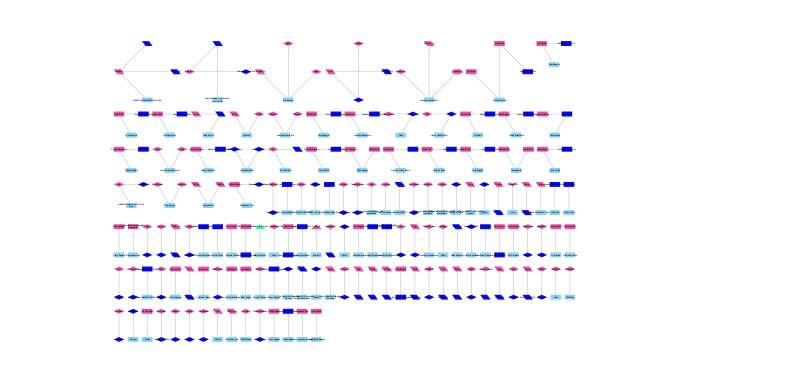

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges